In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML

In [2]:
#Leo mi archivo.csv
Covid = pd.read_csv("COVID19MEXICO.csv")
#Filtro por filas
Covid= Covid.iloc[0:100000,: ]
Covid


/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_1409/3657084836.py:2: DtypeWarning:

Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,27/08/2022,1a4a8d,1,12,23,2,27,23,8,...,2,2,97,1,2,7,99,México,97,97
1,1,27/08/2022,01e27d,2,9,25,2,25,25,1,...,2,2,97,1,2,7,99,México,97,97
2,2,27/08/2022,13cf10,2,9,9,1,9,9,14,...,2,1,1,2,97,3,99,México,97,97
3,3,27/08/2022,13c92b,2,12,9,1,9,9,2,...,1,2,97,1,2,7,99,México,97,97
4,4,27/08/2022,04af5f,2,12,9,1,9,9,7,...,1,2,97,1,2,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,27/08/2022,47548a,2,12,9,1,11,15,31,...,2,1,2,1,2,7,99,México,97,97
99996,99996,27/08/2022,5c2773,2,12,9,2,15,15,95,...,1,2,97,1,2,7,99,México,97,97
99997,99997,27/08/2022,aceb1f,2,4,28,2,28,28,22,...,1,2,97,1,1,3,99,México,97,97
99998,99998,27/08/2022,db2a23,2,4,9,1,15,9,6,...,1,2,97,1,1,3,99,México,97,97


In [5]:
valores_nulos=Covid.isnull().sum()
valores_nulos

Unnamed: 0               0
FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   0
ENTIDAD_UM               0
SEXO                     0
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            0
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     0
NACIONALIDAD             0
EMBARAZO                 0
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             0
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               0
OTRO_CASO                0
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       0
CLASIFICACION_FINAL      0
M

<Figure size 1080x576 with 0 Axes>

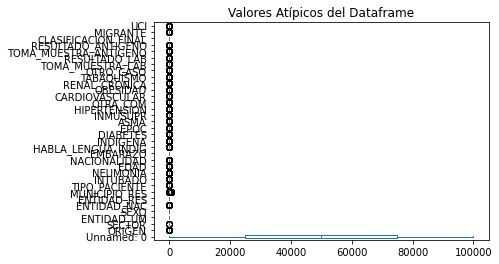

In [11]:
fig = plt.figure(figsize =(15, 8))
Covid.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama